In [1]:
# Sklearn scaling
import os
import numpy as np
import tensorflow as tf
import pandas as pd

C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-

In [2]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
import cv2
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image

In [23]:
# Set up file and dataframe to store accuracy and loss of modelfit epochs
# The code in this cell was commented out after creating the dataframe for all 8 optimizers

file = "modelfit_history.csv"
# modelfit_hist_df = pd.read_csv(file)
# modelfit_hist_df

### Load and process image data using CV2

- Data is found in the kaggle zip file https://www.kaggle.com/kishanj/music-notes-datasets
- Zip file was extracted.
- All of the image files were in folders for by note type (Whole, Half, Quarter, Eight, Sixteenth)
- In order to simplify the code, all files were copied out of their subdirectories into single "Images" folder. 
- The Images folder is part of gitignore, and therefore unavailable from our git repo

In [4]:
# Loop through the Images folder and process each image file
# Append the image to a list and append the class name to a separate list

img_data_array=[]
class_name=[]
folder_name = "Images"

# This code based on https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6
# This is the code that required us to install OpenCV2
# This code also handles the scaling needed

for file in os.listdir(os.path.join(folder_name)):
    
    image_path= os.path.join(folder_name,  file)
    image= cv2.imread( image_path, cv2.IMREAD_GRAYSCALE)
    #image=np.array(image)  ????

    image = image.astype('float32')
    image /= 255 #this gets black and white to 1s and 0s 
    img_data_array.append(image)
    note_class = file[0:1]

    class_name.append(note_class)


In [5]:
def create_dataset(notes_folder):
    class_name = []
    img_data_array = []
    
    for note_dir in os.listdir(notes_folder):
        
        for file in os.listdir(os.path.join(notes_folder, note_dir)):
            image = os.path.join(notes_folder, note_dir, file)
            image = cv2.imread(notes_folder, cv2.COLOR_BGR2RGB)
            #image = cv2.resize( image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            #image = np.array(image)  # converts the image to a numpy array
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(note_dir)
            
    print(img_data_array[0])
    return img_data_array, class_name

In [6]:
# Assign a unique number to each class

note_classifier_dict = {key:value for value, key in enumerate(np.unique(class_name))}

note_classifier_dict

{'e': 0, 'h': 1, 'q': 2, 's': 3, 'w': 4}

In [7]:
# This is y, converting the class names to a numeric value for all values

target_val = [note_classifier_dict[class_name[i]] for i in range(len(class_name))]

# target_val

In [8]:
# Examine the image array ... setting the threshold to 4096 or above avoids truncating the array

np.set_printoptions(threshold=4096)

img_data_array[0]

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1. 

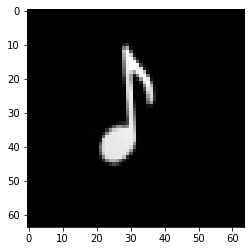

In [9]:
# Test to make sure our images are still good

import matplotlib.pyplot as plt
plt.imshow(img_data_array[10], cmap=plt.cm.Greys)

In [10]:
# Flatten the 64x64 pixels to 1D array 
# This is similar to what was done in MNIST class example

num_dimensions = 64*64

In [11]:
# Make this an np array so we can use reshape on our array to flatten
# the array from 64 x 64 to 1 x 4096 (from a vector matrix to a scalar matrix)

x=np.array(img_data_array, np.float32)

reshape_test = x.reshape(x.shape[0],num_dimensions)

In [12]:
reshape_test.shape

(5000, 4096)

### Split data into train and test sets

In [13]:

X_train, X_test, y_train, y_test = train_test_split(reshape_test,target_val, random_state=42)

### Scaling and Normalization

In [ ]:
# *NOTE*:  Instead of using the code in this cell, we performed the scaling manually above 
# using 'image /= 255' as we loaded each image 

# Next, we normalize our training data to be between 0 and 1
# scaler = MinMaxScaler().fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# X_train[0]

### One-Hot Encoding

In [14]:
# Our Training and Testing labels are integer encoded from 0 to 4
y_train[:20]

[4, 3, 0, 0, 1, 4, 4, 2, 4, 0, 2, 2, 1, 1, 1, 1, 3, 1, 4, 0]

In [15]:
# We have five categories: whole, half, quarter, eighth, and sixteenth notes
num_classes = 5

# Encode the target using one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train[0]

array([0., 0., 0., 0., 1.], dtype=float32)

## Building our Model


### Create a Sequential model

In [141]:
model = Sequential()

In [142]:
# Add the first layer where the input dimensions are 4096 pixels
# Activation function using 'relu' for the hidden layers and 'softmax' for the output layer
# Each of the hidden layers are densely connected and have 100 nodes per layer
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))


### Add a second hidden layer with 100 densely connected nodes

In [143]:
model.add(Dense(100, activation='relu'))

### Final output layer uses softmax activation function for logistic regression

In [144]:
model.add(Dense(num_classes, activation='softmax'))

### Model Summary

In [145]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 100)               409700    
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 505       
Total params: 420,305
Trainable params: 420,305
Non-trainable params: 0
_________________________________________________________________


### Compile and Train our Model 

These were run one at a time, with only one optimizer in play for each run
All of the optimizers were run.  

In [146]:
#  optimizer = "Adam"
# optimizer = "SGD"
# optimizer = "RMSprop"
# optimizer = "Adadelta"
# optimizer = "Adagrad"
# optimizer = "Adamax"
# optimizer = "Nadam"
optimizer = tf.keras.optimizers.Ftrl(learning_rate=.001)#1e-5)

In [147]:
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train (fit) our model using the training data

We are setting the model.fit() equal to a variable 'history' in order to use it to create the plots

In [148]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=0
    )

In [50]:
#below 3 cells were just to store model fit timings to dataframe. commented out after timings achieved.
# import time

In [ ]:
# start = time.time()
# history = model.fit(
#     X_train,
#     y_train,
#     epochs=100,
#     shuffle=True,
#     verbose=0
#     )
# end = time.time()
# print(end - start)

In [ ]:
#timer_list = []
# timer_list.append([optimizer, round(end - start,2)])
# timer_list

In [ ]:
# timer_df=pd.DataFrame(timer_list,columns=["Optimizer","Model_Fit_Time"])
# timer_df.to_csv('Model_fit_100Epoch_timer.csv',index=False)

In [149]:
#Build a dataframe to hold the model fit history values
# modelfit_hist_df=pd.DataFrame()   #only needed for first run
modelfit_hist_df["ftrl_loss"] = history.history['loss']  #only needed for last one
modelfit_hist_df["ftrl_acc"] = history.history['acc']   #only needed for last one

In [110]:
# modelfit_hist_df[optimizer+"_loss"] = history.history['loss']
# modelfit_hist_df[optimizer+"_acc"] = history.history['acc']

In [150]:
modelfit_hist_df #test output

,Adam_loss,Adam_acc,SGD_loss,SGD_acc,RMSprop_loss,RMSprop_acc,Adadelta_loss,Adadelta_acc,Adagrad_loss,Adagrad_acc,Adamax_loss,Adamax_acc,Nadam_loss,Nadam_acc,ftrl_loss,ftrl_acc
0,1.423147,0.398400,1.521942,0.325333,2.277595,0.264267,1.803276,0.197067,1.524281,0.363733,1.383007,0.400800,1.639992,0.337067,1.612974,0.191200
1,0.975080,0.600800,1.326020,0.412533,1.470545,0.376800,1.635225,0.193867,1.248959,0.498400,1.072190,0.572800,1.194547,0.486133,1.609431,0.202667
2,0.838830,0.656267,1.229770,0.461867,1.279867,0.435733,1.582964,0.236533,1.150473,0.578400,0.932655,0.631467,1.098583,0.551467,1.609407,0.203733
3,0.721202,0.694667,1.121811,0.510667,1.232945,0.478667,1.556724,0.281333,1.082773,0.612800,0.882641,0.637333,0.959175,0.608000,1.609385,0.203733
4,0.684502,0.713067,1.122801,0.529867,1.123271,0.536800,1.538437,0.331733,1.029100,0.629067,0.777351,0.688800,0.881424,0.620533,1.609361,0.203733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.106645,0.960533,0.261468,0.921600,0.207965,0.941867,1.012725,0.666667,0.409327,0.866133,0.088129,0.971733,0.034892,0.989867,1.124863,0.522133
96,0.143877,0.948267,0.139401,0.951467,0.184590,0.944267,1.009720,0.666133,0.408460,0.861600,0.067114,0.980000,0.072421,0.975467,1.120839,0.521067
97,0.049912,0.981067,0.183360,0.940000,0.222012,0.938667,1.007210,0.665067,0.406451,0.865600,0.095791,0.964533,0.086361,0.978400,1.116178,0.520000
98,0.076292,0.972533,0.148199,0.954933,0.165674,0.944000,1.004020,0.667733,0.405772,0.864533,0.072626,0.977067,0.032087,0.992267,1.112328,0.524267


In [151]:
modelfit_hist_df.to_csv(file, index=False)
#modelfit_hist_df.to_csv('FTRL_ACC_LOSS.csv', index=False)

In [ ]:
#history.model #testing output

### Visualization of the Optimizer performance
The loss and accuracy for each optimizer and save each plot as a file and save the model

C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'middle'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


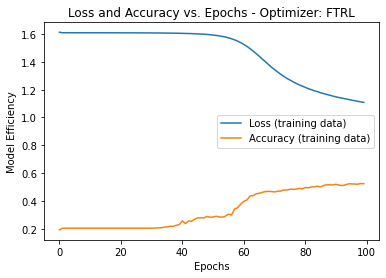

In [152]:
plt.plot(history.history['loss'], label='Loss (training data)')
# plt.plot(history.history['acc'], label='MAE (validation data)')
plt.plot(history.history['acc'], label='Accuracy (training data)')
# plt.title('Loss and Accuracy vs. Epochs - Optimizer: '+ optimizer)
plt.title('Loss and Accuracy vs. Epochs - Optimizer: FTRL')
plt.ylabel('Model Efficiency')
plt.xlabel('Epochs')
plt.legend(loc="middle")
# plt.savefig("Results/100epoch_relu_" + optimizer + ".jpeg")
plt.savefig("Results/100epoch_relu_FTRL.jpeg")
plt.show()

In [113]:
# commented out so we don't resave over existing file
model.save("Results/Notes_relu_" + optimizer + ".h5")

## Evaluating the Model

Evaluate each of the 8 optimizers and store the loss and accuracy in a new DF

In [120]:
from tensorflow.keras.models import load_model


In [121]:
#define list to hold model eval results
# df_list = []


In [156]:
# this box was used for ftrl alone as it's not save-able via standard save command.  it was run *after all the function below was run
# model_loss, model_accuracy = model.evaluate(X_test,y_test, verbose=2)
df_list.append(['ftrl', model_loss,model_accuracy])

In [124]:
def model_predictions(results_folder):

    
     for model_file in os.listdir(os.path.join(results_folder)):
            if "h5" in model_file:
                print("working on file: "+model_file)
                model = load_model(os.path.join(results_folder,model_file))
#                 break #for testing purposes only
                try:
                    model_loss, model_accuracy = model.evaluate(X_test,y_test, verbose=2)
                    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
                    df_list.append([model_file, model_loss,model_accuracy])
                except:
                    print("Ftrl model defies being saved and will not load. filename:"+model_file)
                
                
                

In [125]:
model_predictions('Results')

working on file: notes_relu_Adadelta.h5
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
1250/1250 - 0s - loss: 1.0089 - acc: 0.6488
Loss: 1.0088697247982026, Accuracy: 0.6488000154495239
working on file: notes_relu_Adagrad.h5
1250/1250 - 0s - loss: 0.4594 - acc: 0.8424
Loss: 0.4593663999140263, Accuracy: 0.8424000144004822
working on file: notes_relu_Adam.h5
1250/1250 - 0s - loss: 0.1324 - acc: 0.9600
Loss: 0.1324001303553563, Accuracy: 0.9599999785423279
working on file: notes_relu_Adamax.h5
1250/1250 - 0s - loss: 0.1591 - acc: 0.9504
Loss: 0.15908841733931914, Accuracy: 0.9503999948501587
working on file: notes_relu_Ftrl.h5
Ftrl model defies being saved and will not load. filename:notes_relu_Ftrl.h5
working on file: notes_relu_Nadam.h5
1250/1250 - 0s - loss: 0.1940 - acc: 0.9408
Loss: 0.193975236749

In [158]:
# put results to df
print(df_list)
results_df = pd.DataFrame(df_list,columns=["Model","Loss","Accuracy"])

[['notes_relu_Adadelta.h5', 1.0088697247982026, 0.6488], ['notes_relu_Adagrad.h5', 0.4593663999140263, 0.8424], ['notes_relu_Adam.h5', 0.1324001303553563, 0.96], ['notes_relu_Adamax.h5', 0.15908841733931914, 0.9504], ['notes_relu_Nadam.h5', 0.19397523674964906, 0.9408], ['notes_relu_RMSprop.h5', 0.9425227928161621, 0.76], ['notes_relu_SGD.h5', 0.15445830640678176, 0.948], ['ftrl', 1.108062178325653, 0.5416]]


In [160]:
#save to csv for later loading/graphing elsewhere
results_df.to_csv(os.path.join('Results','Model_predict_loss_acc.csv'),index=False)

In [159]:
results_df

,Model,Loss,Accuracy
0,notes_relu_Adadelta.h5,1.008870,0.6488
1,notes_relu_Adagrad.h5,0.459366,0.8424
2,notes_relu_Adam.h5,0.132400,0.9600
3,notes_relu_Adamax.h5,0.159088,0.9504
4,notes_relu_Nadam.h5,0.193975,0.9408
5,notes_relu_RMSprop.h5,0.942523,0.7600
6,notes_relu_SGD.h5,0.154458,0.9480
7,ftrl,1.108062,0.5416


# Try our model on some hand drawn notes
shout out to MS Paint

In [ ]:
model = load_model(os.path.join('Results','notes_relu_Adam.h5'))  # change file for the model you want to try

In [ ]:
#put a file in the TestImage folder and set it to filepath here.  Note we've tested a few different files already:
#filepath = "TestImage/note_pensketch.jpg"   # so it thought this guy was an eigth note
#filepath = "TestImage/mn5.png"  # successfully predicted Fukhrudin's whole notes
#filepath = "TestImage/sharon.png"  
filepath = "TestImage/eigth_fukhrudin.png"  

In [ ]:
from tensorflow.keras.preprocessing import image
image_size = (64, 64)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

In [ ]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

In [ ]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 64*64)
img.shape

In [ ]:
plt.imshow(img.reshape(64, 64), cmap=plt.cm.Greys)

dictionary of classifications
{'eigth': 0, 'half': 1, 'quarter': 2, 'sixteenth': 3, 'whole': 4}

In [ ]:
model.predict_classes(img)
